In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

## **Data Setup and Preview**

In [3]:
# azure path 
#data_path =  Path.home()/'notebooks/programming/data/watch_bot'
#csv_path = Path.home()/'notebooks/programming/projects/watch_bot/data_prep/file_attribs.csv'

# euler path
data_path =  Path.home()/'programming/data/chrono24'
csv_path = data_path/'file_attribs_inference.csv'

In [14]:
df = pd.read_csv(csv_path)
df = df[['name', 'dial_visibility']]
df = df.astype({'dial_visibility':'int'})
df.head(), df.dtypes

(                                                name  dial_visibility
 0  a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...               -1
 1  a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...               -1
 2  a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...               -1
 3  a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...               -1
 4  a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...               -1,
 name               object
 dial_visibility     int64
 dtype: object)

# **Get Prediction**

## **Single Image**

In [51]:
learn = load_learner(data_path)

tensor([6.3604e-04, 9.9936e-01])
vacheron_constantin_1/vacheron_constantin/_without_model/vacheron_constantin_ultra_plate_yellow_gold-7.jpg


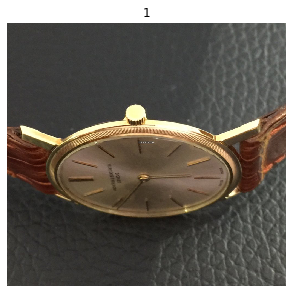

In [52]:
name = df.iloc[1000000]['name']
img_path = data_path/name
img = open_image(img_path)
pred_class, pred_idx, outputs = learn.predict(img)
img.show(figsize=(5,5), title=str(pred_class))
print(f'{outputs}\n{name}')

## **Larger Dataset**

In [39]:
learn = load_learner(data_path, test=ImageList.from_df(df.head(), data_path))
preds, y = learn.get_preds(ds_type=DatasetType.Test)
preds, y
#preds[:5]

(tensor([[2.3513e-05, 9.9998e-01],
         [2.8018e-03, 9.9720e-01],
         [6.8241e-04, 9.9932e-01],
         [6.7628e-02, 9.3237e-01],
         [8.3976e-04, 9.9916e-01]]),
 tensor([0, 0, 0, 0, 0]))

In [40]:
learn.data

ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/neronicolo/programming/data/chrono24;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/neronicolo/programming/data/chrono24;

Test: LabelList (5 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: /home/neronicolo/programming/data/chrono24

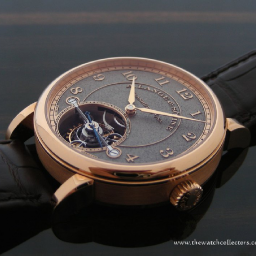

In [41]:
learn.data.test_ds[0][0]

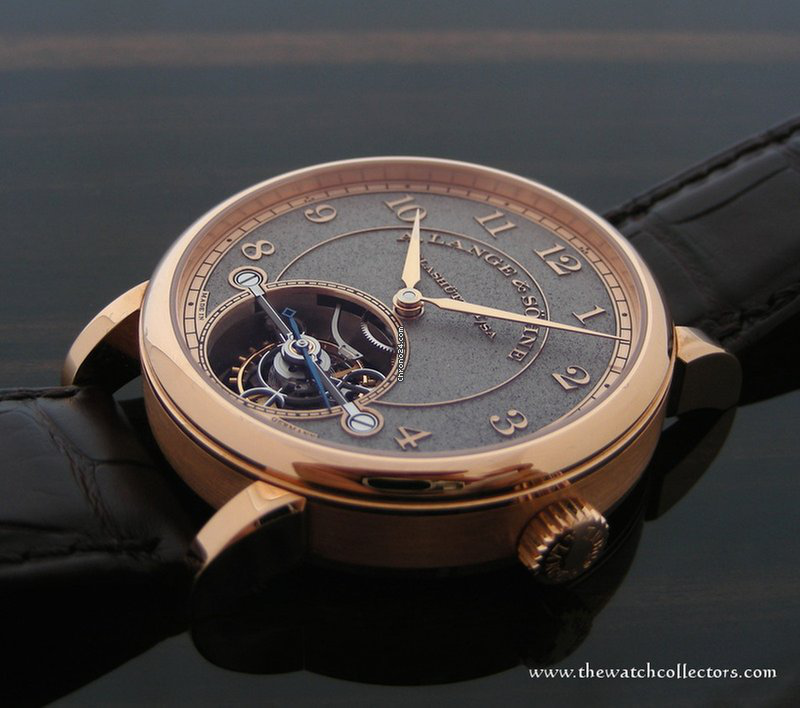

In [47]:
learn.data.test_ds.x[0]